<a href="https://colab.research.google.com/github/AinaHerrera/ejerciciosIA/blob/main/Taller_practico_jugadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Paso 1: Importando librerias 🧰**
El objetivo de este bloque es cargar todas las librerías de código que serán necesarias para el procesamiento de los datos.

Pandas y Numpy: Para leer y manipular los datos del dataset.

Matplotlib y Seaborn: Para crear los gráficos y poder visualizar la información.

Scikit-learn (sklearn): Para obtener las herramientas necesarias para construir y evaluar nuestro modelo de predicción.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# **Paso 2: Cargando los datos de nuestros jugadores 💾**

El objetivo de este bloque es leer el archivo CSV que contiene toda la información de los jugadores y cargarlo en nuestro programa.

Aquí, usamos Pandas (pd.read_csv) para abrir el archivo y guardar todos los datos en una tabla que llamamos df (es la abreviatura de DataFrame).

Luego, con df.head(), le pedimos que nos muestre las primeras 5 filas de la tabla. Esto es como asomarnos a la caja para verificar rápidamente que los datos se cargaron bien y tienen el aspecto que esperamos. El código también tiene un pequeño sistema de seguridad (try/except) por si el archivo no se encuentra, para que nos avise en lugar de fallar.

In [49]:
try:
    df = pd.read_csv('/content/retencion jugadores csv - jugadores.csv')
    print("CSV file loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print("Error: File not found. Please check the path to your CSV file.")
except Exception as e:
    print(f"An error occurred: {e}")

CSV file loaded successfully!


,jugador_id,horas_juego_dia1,horas_juego_semana,niveles_completados,amigos_agregados,compras,plataforma,retencion_7dias
0,1,2.54,29.98,4,12,0.0,pc,1
1,2,0.88,4.86,2,0,0.0,mobile,0
2,3,3.31,16.59,4,15,0.0,mobile,0
3,4,2.37,20.84,2,11,0.0,console,1
4,5,3.34,16.03,5,8,0.0,mobile,1


# **Paso 3: Revisando la "ficha técnica" de los datos 📝**
El objetivo de este bloque es obtener un resumen técnico y rápido de nuestro conjunto de datos.

Esto es como mirar la etiqueta de un producto para ver sus especificaciones. El comando (df.info()) nos da una "radiografía" de la tabla de jugadores, mostrándonos:

Cuántos datos tenemos: Nos confirma que hay 1000 jugadores (entries).

Datos faltantes: La columna Non-Null Count nos dice cuántos registros no están vacíos. Si este número fuera menor a 1000, sabríamos que nos falta información en esa columna.

Tipos de datos (Dtype): Nos muestra cómo el programa está interpretando cada columna. Por ejemplo, float64 son números con decimales (como las horas), int64 son números enteros (como los niveles) y object suele ser texto (como la plataforma).

En resumen, este paso es una revisión de calidad fundamental para asegurarnos de que no hay datos faltantes (todavía) y que los tipos de datos son los correctos antes de empezar a analizar.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   jugador_id           1000 non-null   int64  
 1   horas_juego_dia1     1000 non-null   float64
 2   horas_juego_semana   1000 non-null   float64
 3   niveles_completados  1000 non-null   int64  
 4   amigos_agregados     1000 non-null   int64  
 5   compras              1000 non-null   float64
 6   plataforma           1000 non-null   object 
 7   retencion_7dias      1000 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 62.6+ KB


# **Paso 4: Un primer vistazo matemático a nuestros jugadores 📊**
El objetivo de este bloque es obtener un resumen estadístico de todas las columnas numéricas.

Con el comando df.describe(), le pedimos a Pandas que nos dé un "reporte rápido" de los datos de nuestros jugadores. Nos muestra métricas clave como:

mean (la media): El valor promedio. Por ejemplo, podemos ver las horas promedio que juega un usuario en su primer día.

min y max: El valor mínimo y el máximo. Esto nos ayuda a entender los rangos de comportamiento, desde el jugador menos activo hasta el más comprometido.

std (desviación estándar): Nos dice qué tan dispersos están los datos. Un número grande significa que hay mucha variedad en el comportamiento de los jugadores.

Este paso es súper útil para detectar a simple vista si hay algo raro o inesperado en los datos (por ejemplo, un valor máximo imposible) y para empezar a entender los patrones generales de comportamiento de los jugadores.

In [51]:
display(df.describe())

,jugador_id,horas_juego_dia1,horas_juego_semana,niveles_completados,amigos_agregados,compras,retencion_7dias
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.00000,1000.000000
mean,500.500000,1.175920,8.984060,1.70900,4.07500,0.01808,0.026000
std,288.819436,0.486166,3.403622,0.81914,2.01679,0.57174,0.159215
min,1.000000,0.100000,0.470000,0.00000,0.00000,0.00000,0.000000
25%,250.750000,1.000000,8.120000,1.00000,4.00000,0.00000,0.000000
50%,500.500000,1.150000,9.450000,2.00000,4.00000,0.00000,0.000000
75%,750.250000,1.260000,10.330000,2.00000,5.00000,0.00000,0.000000
max,1000.000000,5.200000,30.560000,7.00000,22.00000,18.08000,1.000000


# **Paso 5: Comparando el tiempo de juego con la retención 📈**
El objetivo de este bloque es visualizar si existe una relación entre las horas que un jugador juega en su primera semana y si decide quedarse en el juego.

Para esto, creamos un gráfico de caja (boxplot). Este tipo de gráfico es perfecto para comparar dos grupos:

Grupo 1 (izquierda): Jugadores que no fueron retenidos (Not Retained).

Grupo 2 (derecha): Jugadores que sí fueron retenidos (Retained).

Lo que hacemos es comparar la distribución de las horas_juego_semana para cada grupo. El gráfico nos permite ver de un solo vistazo que la caja de los jugadores "retenidos" está mucho más arriba, lo que nos da una pista muy fuerte: los jugadores que juegan más horas durante la primera semana tienen una mayor tendencia a quedarse en el juego.

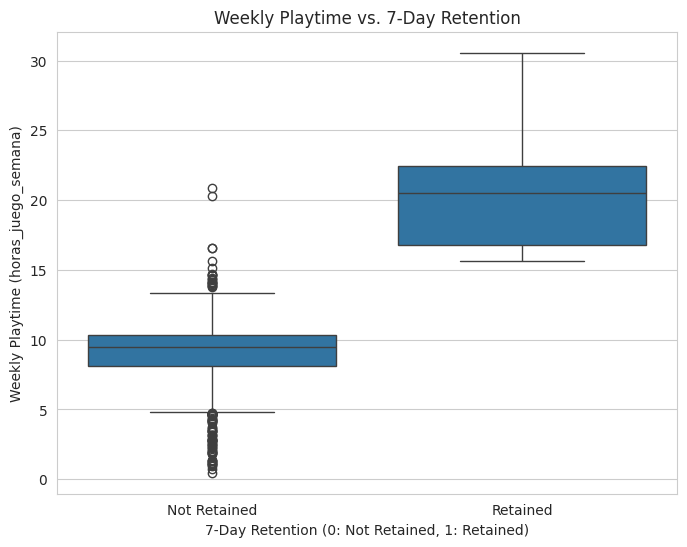

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='retencion_7dias', y='horas_juego_semana', data=df)
plt.title('Weekly Playtime vs. 7-Day Retention')
plt.xlabel('7-Day Retention (0: Not Retained, 1: Retained)')
plt.ylabel('Weekly Playtime (horas_juego_semana)')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()

# **Paso 6: Investigando la relación entre compras y retención 💰**
El objetivo de este bloque es visualizar si los jugadores que gastan dinero en el juego son más propensos a quedarse.

Al igual que en el paso anterior, usamos un gráfico de caja para comparar a los jugadores que se fueron ("Not Retained") con los que se quedaron ("Retained"). Esta vez, miramos la variable compras.

El resultado es muy claro: las cajas para ambos grupos están completamente planas en cero. Esto nos dice que la gran mayoría de los jugadores, sin importar si se quedaron o se fueron, no hicieron ninguna compra en la primera semana. El pequeño círculo en el grupo "Retained" es un caso aislado (un "outlier"), un jugador que sí gastó dinero y se quedó. Por ahora, esto sugiere que las compras no parecen ser un factor decisivo para la retención en general.

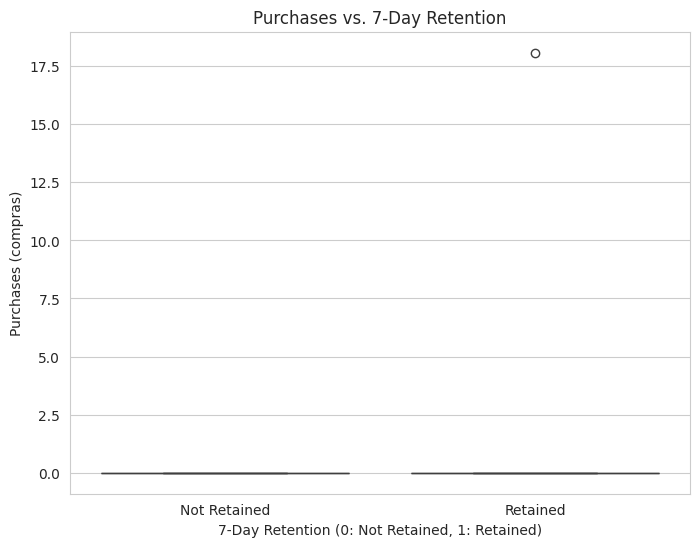

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='retencion_7dias', y='compras', data=df)
plt.title('Purchases vs. 7-Day Retention')
plt.xlabel('7-Day Retention (0: Not Retained, 1: Retained)')
plt.ylabel('Purchases (compras)')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()

# **Paso 7: Interpretación del Mapa de Calor de la Matriz de Correlación** ⚡

El mapa de calor de la matriz de correlación muestra las relaciones que existen entre nuestras variables numéricas. Aquí explico su relacion con la variable objetivo: retencion_7dias:

horas_juego_dia1 y retencion_7dias: Hay una correlación positiva (0.62). Esto sugiere que los jugadores que juegan más durante su primer día tienen más probabilidades de quedarse.

horas_juego_semana y retencion_7dias: De manera similar, hay una correlación positiva moderada (0.58). Esto refuerza la idea de que un mayor compromiso inicial en términos de tiempo de juego está asociado con una mayor retención.

niveles_completados y retencion_7dias: Existe una correlación positiva (0.53). Parece que completar más niveles al principio está relacionado con quedarse en el juego.

amigos_agregados y retencion_7dias: Aquí también vemos una correlación positiv (0.62). Los jugadores que se conectan con más amigos son más propensos a ser retenidos, lo que destaca la importancia de las funciones sociales del juego.

compras y retencion_7dias: La correlación es relativamente débil (0.19). Esto coincide con el gráfico de caja: la mayoría de los jugadores, se queden o no, no hicieron compras en la primera semana. Aunque hay una ligera relación positiva, no parece ser un predictor fuerte.

Otras correlaciones importantes
Hay correlaciones positivas muy fuertes entre las diferentes métricas de tiempo de juego (horas_juego_dia1 y horas_juego_semana), y también entre el tiempo de juego y los niveles completados o amigos agregados. Suena lógico que los jugadores que pasan más tiempo en el juego completen más niveles y agreguen más amigos.

En resumen, la matriz de correlación nos sugiere que el tiempo de juego inicial, los niveles completados y, especialmente, el número de amigos agregados están relacionados positivamente con la retención de jugadores. Las compras, en cambio, muestran una relación mucho más débil.


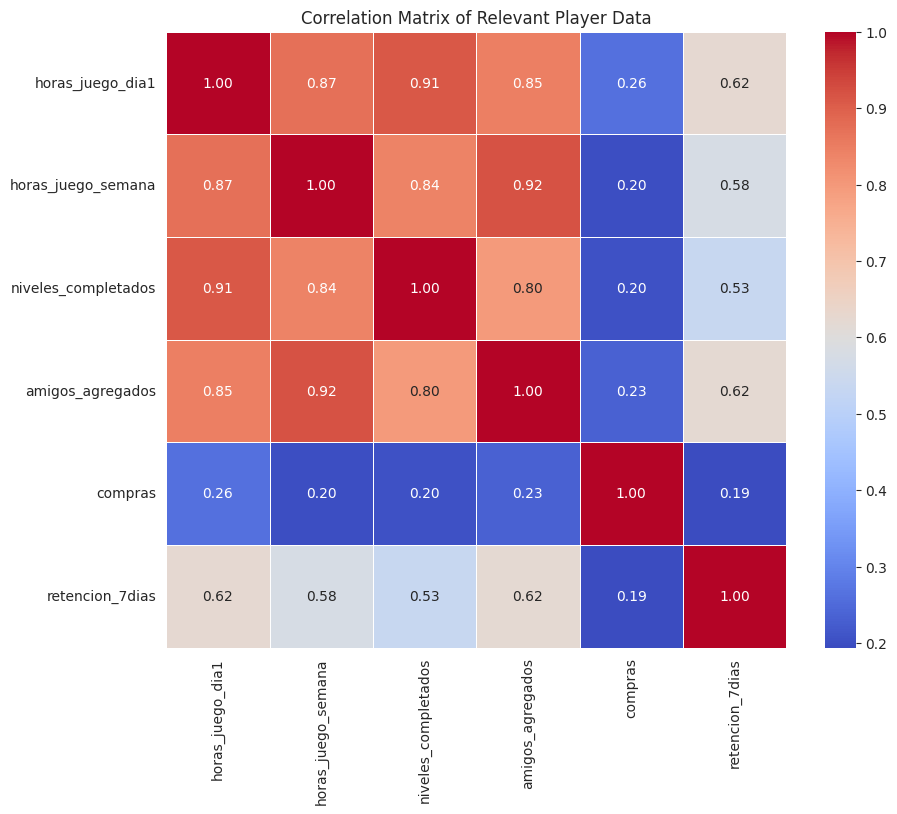

In [54]:
# Select the relevant numerical columns for the correlation matrix
numerical_cols = ['horas_juego_dia1', 'horas_juego_semana', 'niveles_completados', 'amigos_agregados', 'compras', 'retencion_7dias']
df_numerical = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Relevant Player Data')
plt.show()

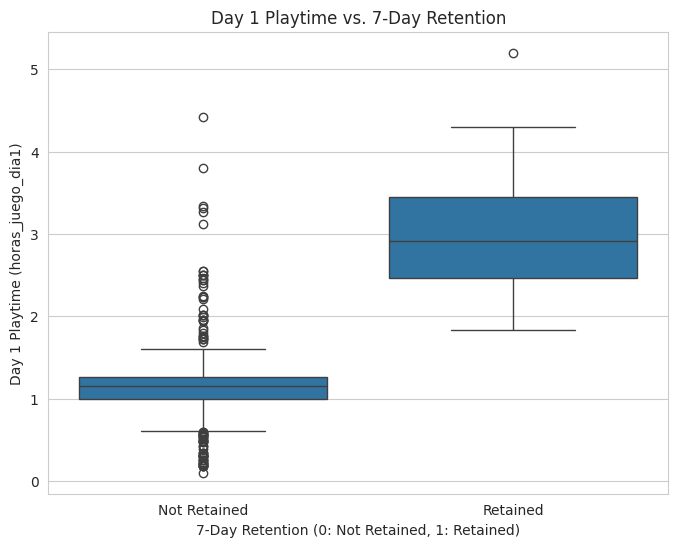

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='retencion_7dias', y='horas_juego_dia1', data=df)
plt.title('Day 1 Playtime vs. 7-Day Retention')
plt.xlabel('7-Day Retention (0: Not Retained, 1: Retained)')
plt.ylabel('Day 1 Playtime (horas_juego_dia1)')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()

# **Paso 8: ¿Es importante el primer día de juego? ⏳**
El objetivo de este bloque es investigar si las horas jugadas específicamente en el primer día son un buen indicador de si el jugador volverá.

Nuevamente, utilicé un gráfico de caja para comparar a los jugadores que se quedaron (Retained) con los que no (Not Retained). Esta vez, nos enfocamos en la variable horas_juego_dia1.

La conclusión es muy similar a la que vimos con las horas semanales, pero aún más específica. El gráfico muestra que los jugadores que dedicaron más tiempo al juego en su primer día tuvieron una probabilidad mucho mayor de seguir jugando una semana después. Esto nos dice que la experiencia del primer día es crucial para enganchar a un nuevo jugador.

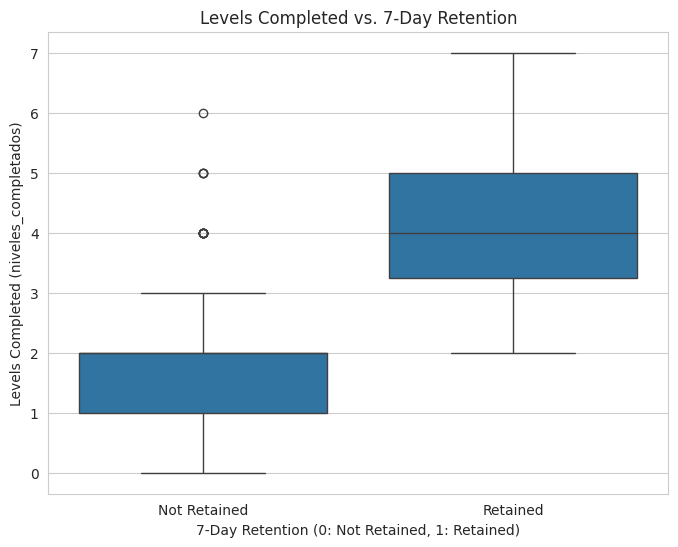

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='retencion_7dias', y='niveles_completados', data=df)
plt.title('Levels Completed vs. 7-Day Retention')
plt.xlabel('7-Day Retention (0: Not Retained, 1: Retained)')
plt.ylabel('Levels Completed (niveles_completados)')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()

# **Paso 9: ¿Progresar en el juego importa para quedarse? 🏆**
El objetivo de este bloque es descubrir si los jugadores que avanzan más en el juego (completando niveles) son los que tienden a quedarse.

Una vez más, utilicpe un gráfico de caja para comparar a nuestros dos grupos de jugadores: los que se fueron (Not Retained) y los que se quedaron (Retained), dando enfasis ahora en la variable niveles_completados.

La conclusión de este gráfico es: los jugadores que fueron retenidos completaron, en promedio, más niveles que los que abandonaron el juego. Esto confirma que el sentimiento de progreso es un factor clave para que un jugador se enganche y decida seguir jugando.

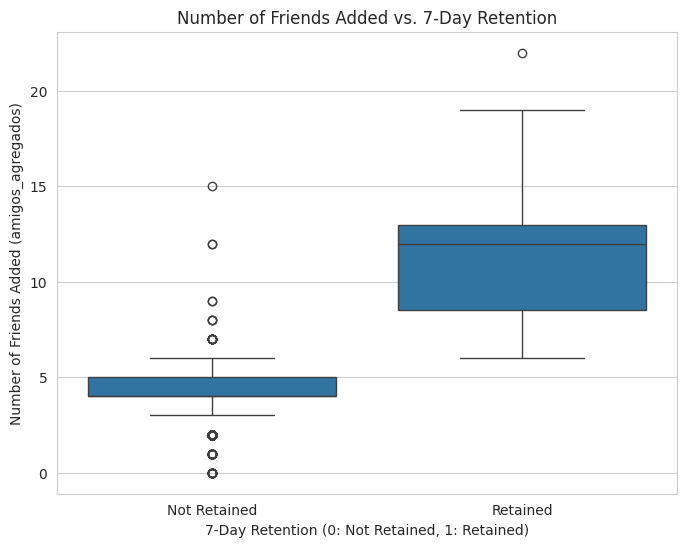

In [57]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='retencion_7dias', y='amigos_agregados', data=df)
plt.title('Number of Friends Added vs. 7-Day Retention')
plt.xlabel('7-Day Retention (0: Not Retained, 1: Retained)')
plt.ylabel('Number of Friends Added (amigos_agregados)')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()

# **Paso 10: Investigando amigos 🧑‍🤝‍🧑**
El objetivo de este bloque es determinar si tener una actividad social dentro del juego, como agregar amigos, influye en que un jugador decida quedarse.

Para explorarlo, con un gráfico de caja que compara la cantidad de amigos_agregados entre los jugadores que se fueron (Not Retained) y los que se quedaron (Retained).

El resultado: La caja del grupo "Retained" está notablemente más alta, lo que nos indica que los jugadores que interactúan socialmente y agregan más amigos tienen una tendencia mucho mayor a seguir jugando.

Esto sugiere que fomentar las conexiones entre jugadores es una estrategia clave para la retención.

*(Siendo muy honesta aquí, no esperaba que esta variable influyera mucho, quedé impactada).*

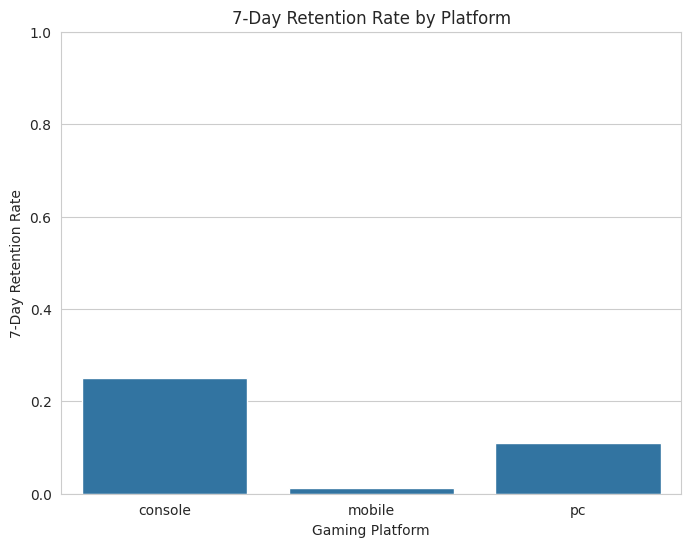

In [58]:
# Calculate the retention rate for each platform
platform_retention = df.groupby('plataforma')['retencion_7dias'].mean().reset_index()

# Plot the retention rate by platform
plt.figure(figsize=(8, 6))
sns.barplot(x='plataforma', y='retencion_7dias', data=platform_retention)
plt.title('7-Day Retention Rate by Platform')
plt.xlabel('Gaming Platform')
plt.ylabel('7-Day Retention Rate')
plt.ylim(0, 1) # Set y-axis limit to represent proportion
plt.show()

# **Paso 11: ¿La plataforma de juego importa? 🖥️📱🕹️**
El objetivo de este bloque es comparar la tasa de retención de jugadores entre las diferentes plataformas (consola, mobile y pc) para ver si alguna es más "pegajosa" que las otras.

El proceso tiene dos partes:

1. **Cálculo:** Primero, el código agrupa a todos los jugadores por su plataforma. Luego, para cada grupo, calcula la tasa de retención promedio.

2. **Visualización:** Después, crea un gráfico de barras para poder comparar estos promedios de un solo vistazo. La altura de cada barra nos muestra qué porcentaje de jugadores se quedó en cada plataforma.

Conclusión: el gráfico muestra que los jugadores de consola tienen una tasa de retención mucho más alta en comparación con los de PC y, especialmente, con los de mobile, que tienen la retención más baja de todas.

# **Paso 12: ¿De dónde vienen nuestros jugadores? 📊**
El objetivo de este bloque es contar cuántos jugadores tenemos en cada una de las plataformas para entender la distribución de nuestra base de jugadores.

El gráfico nos muestra que la inmensa mayoría de nuestros nuevos jugadores provienen de la plataforma mobile. Este es un dato crucial, porque si lo conectamos con el hallazgo anterior, se puede concluir que la plataforma que atrae a más jugadores (mobile) es también la que tiene la tasa de retención más baja.

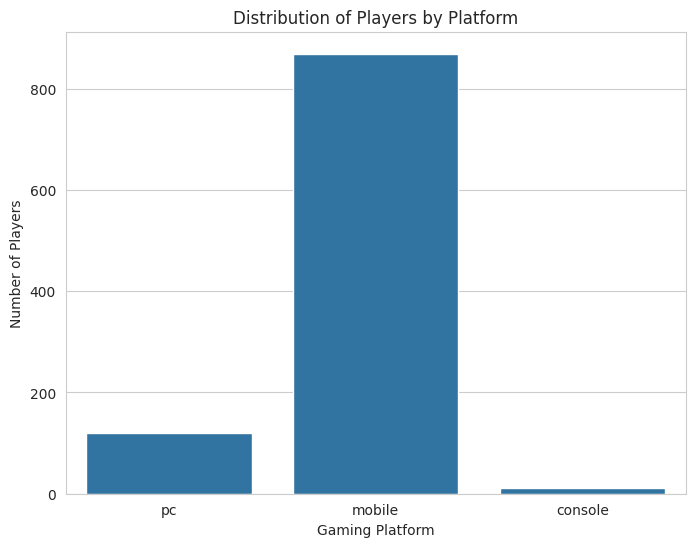

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='plataforma', data=df)
plt.title('Distribution of Players by Platform')
plt.xlabel('Gaming Platform')
plt.ylabel('Number of Players')
plt.show()

# **Paso 13: One-Hot Encoding de variables categoricas de 'plataforma':**

Como el modelo sólo entiende de números, pero la columna 'plataforma' tiene texto ('mobile', 'pc', 'console'). Obviamente, no podía dejarla así.

Para solucionarlo, usé One-Hot Encoding. Lo que hice fue, básicamente, convertir esa única columna de texto en nuevas columnas numéricas. Simplemente, en una nueva columna llamada plataforma_pc le puse un 1 y en las demás un 0.

Pero aquí aprendí mucho con este ejercicio. Si creaba una columna para cada plataforma (pc, mobile y console), generaba un problema llamado multicolinealidad (que realmente no conocía pero aprendí investigando un poco). Esto sucede cuando una variable se puede adivinar perfectamente a partir de las otras. Por ejemplo, si un jugador tiene un 0 en plataforma_pc y un 0 en plataforma_mobile, es 100% seguro que es de 'console'. Esta información es redundante y, al parecer, puede confundir a algunos modelos y afectar sus resultados.

Para evitar este problema, usé un parámetro llamado drop_first=True. Lo que hace es eliminar automáticamente una de las nuevas columnas. Por esa razón, al final me quedé solo con plataforma_mobile y plataforma_pc. Con estas dos es suficiente, porque si un jugador tiene un 0 en ambas, el modelo ya sabe que pertenece a la categoría que eliminamos ('console').

Así que con este cambio, no solo logré que la información estuviera en formato numérico, sino que también evité ese problema de multicolinealidad dejando los datos listos y sin redundancias para el modelo.

In [60]:
df = pd.get_dummies(df, columns=['plataforma'], drop_first=True)
display(df.head())

,jugador_id,horas_juego_dia1,horas_juego_semana,niveles_completados,amigos_agregados,compras,retencion_7dias,plataforma_mobile,plataforma_pc
0,1,2.54,29.98,4,12,0.0,1,False,True
1,2,0.88,4.86,2,0,0.0,0,True,False
2,3,3.31,16.59,4,15,0.0,0,True,False
3,4,2.37,20.84,2,11,0.0,1,False,False
4,5,3.34,16.03,5,8,0.0,1,True,False


# **Paso 13: Pasando lista a los datos 📋**
El objetivo de este bloque es revisar nuestro conjunto de datos para ver si falta alguna información por hacer limpieza.

El resultado nos muestra un cero (0) para cada una de las columnas. Esto nos confirma que, por ahora, nuestro dataset está completo y no tiene ningún valor faltante.

In [61]:
display(df.isnull().sum())

,0
jugador_id,0
horas_juego_dia1,0
horas_juego_semana,0
niveles_completados,0
amigos_agregados,0
compras,0
retencion_7dias,0
plataforma_mobile,0
plataforma_pc,0


# **Paso 14: Exportar .csv para el procesamiento en KNIME 💾**
El objetivo de este bloque es guardar nuestro DataFrame actual en un nuevo archivo CSV.

La instrucción index=False hace que no guarde los números de fila como si fueran una columna de datos, manteniendo el archivo limpio.

En resumen, ya con los datos listos para la siguiente etapa, que es la preparación final y la construcción del modelo predictivo...

In [62]:
# Define the path and filename for the new CSV file
output_csv_path = '/content/modified_jugadores.csv'

# Export the DataFrame to a CSV file (without the index)
df.to_csv(output_csv_path, index=False)

print(f"Modified DataFrame exported successfully to: {output_csv_path}")

Modified DataFrame exported successfully to: /content/modified_jugadores.csv


# **Conclusión:**

Con este EDA pudimos entender los datos de los jugadores. Después de revisar toda la información y crear los gráficos, ya se tiene una idea mucho más clara de qué es lo que realmente importa para que un jugador decida quedarse en un juego.

Algunos datos interesantes descubiertos fueron:

- Los jugadores que se quedan son los que se enganchan de verdad: juegan más horas (especialmente el primer día), completan más niveles y se sumergen más en el juego. Pero quizás lo más interesante es el factor social: hacer amigos dentro del juego es un indicador fuerte de que un jugador volverá.

- Las compras dentro del juego, por ejemplo, no mostraron ser un buen predictor, ya que la mayoría de los jugadores no gastaron dinero.

En resumen, para nuestro modelo de predicción, ya se tiene una idea más clara de cuáles son las pistas más importantes a seguir:

1. El compromiso y el progreso del jugador (horas jugadas, niveles completados).

2. La interacción social (amigos agregados).

3. La plataforma desde la que juegan.

